In [5]:
 ! pip install kaggle

## Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, auc

import warnings


In [7]:
warnings.filterwarnings('ignore')

In [8]:
sns.set()
plt.style.use('ggplot')

In [9]:
from zipfile import ZipFile

In [10]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [11]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 56.5MB/s]


In [12]:
with ZipFile('/content/breast-cancer-wisconsin-data.zip','r') as z:
    z.extractall()


## Data Preprocessing

In [13]:
data = pd.read_csv('/content/data.csv')

In [14]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
#checking null values
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [18]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [19]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# Converting target variable into numerical
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0 )

## Distribution of Traget Feature

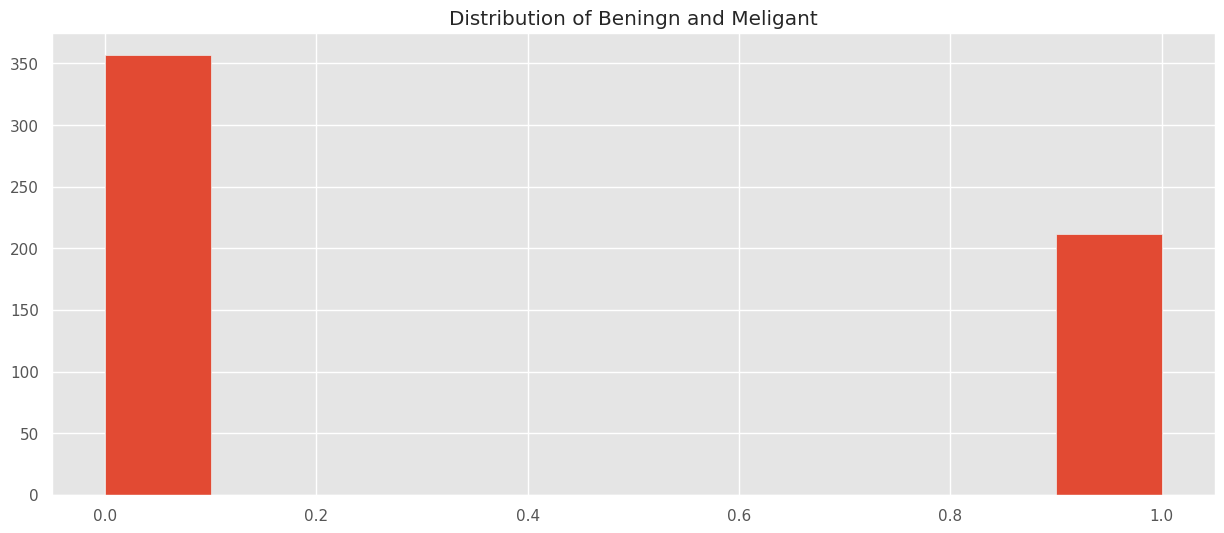

In [21]:
plt.figure(figsize=(15,6))
plt.hist(data['diagnosis'])
plt.title("Distribution of Beningn and Meligant")
plt.show()

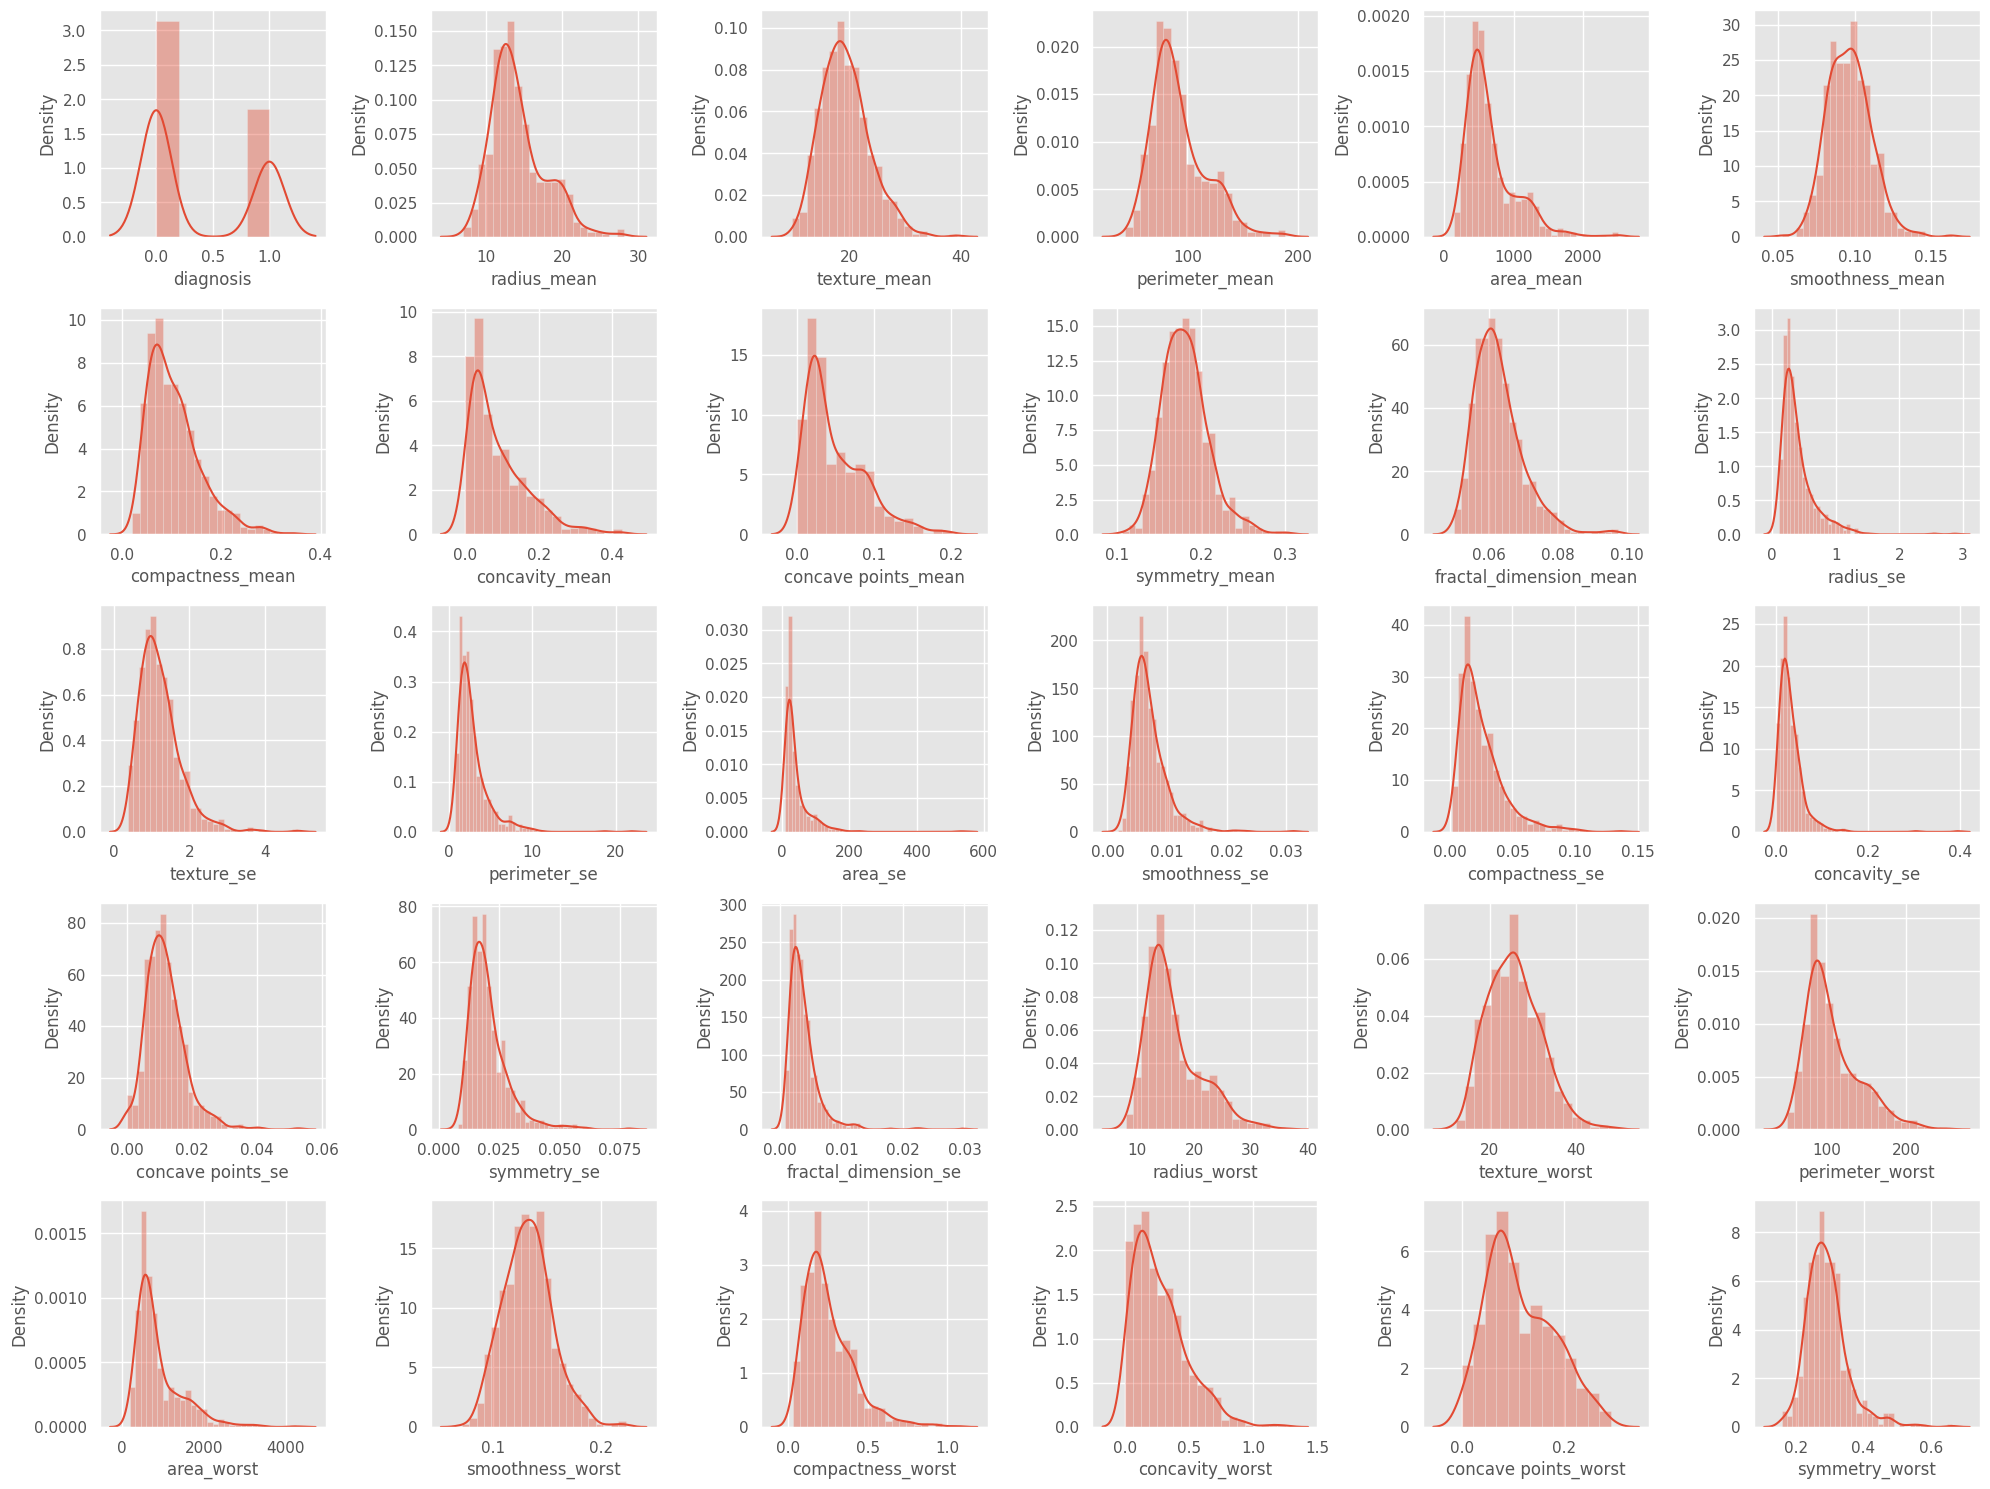

In [22]:
plt.figure(figsize=(20,15))
x=1

for col in data:
  if x <=30:
    ax = plt.subplot(5,6,x)
    sns.distplot(data[col])
    plt.xlabel(col)
    x+=1

plt.tight_layout()
plt.show()

## heatmap of correlated Feature

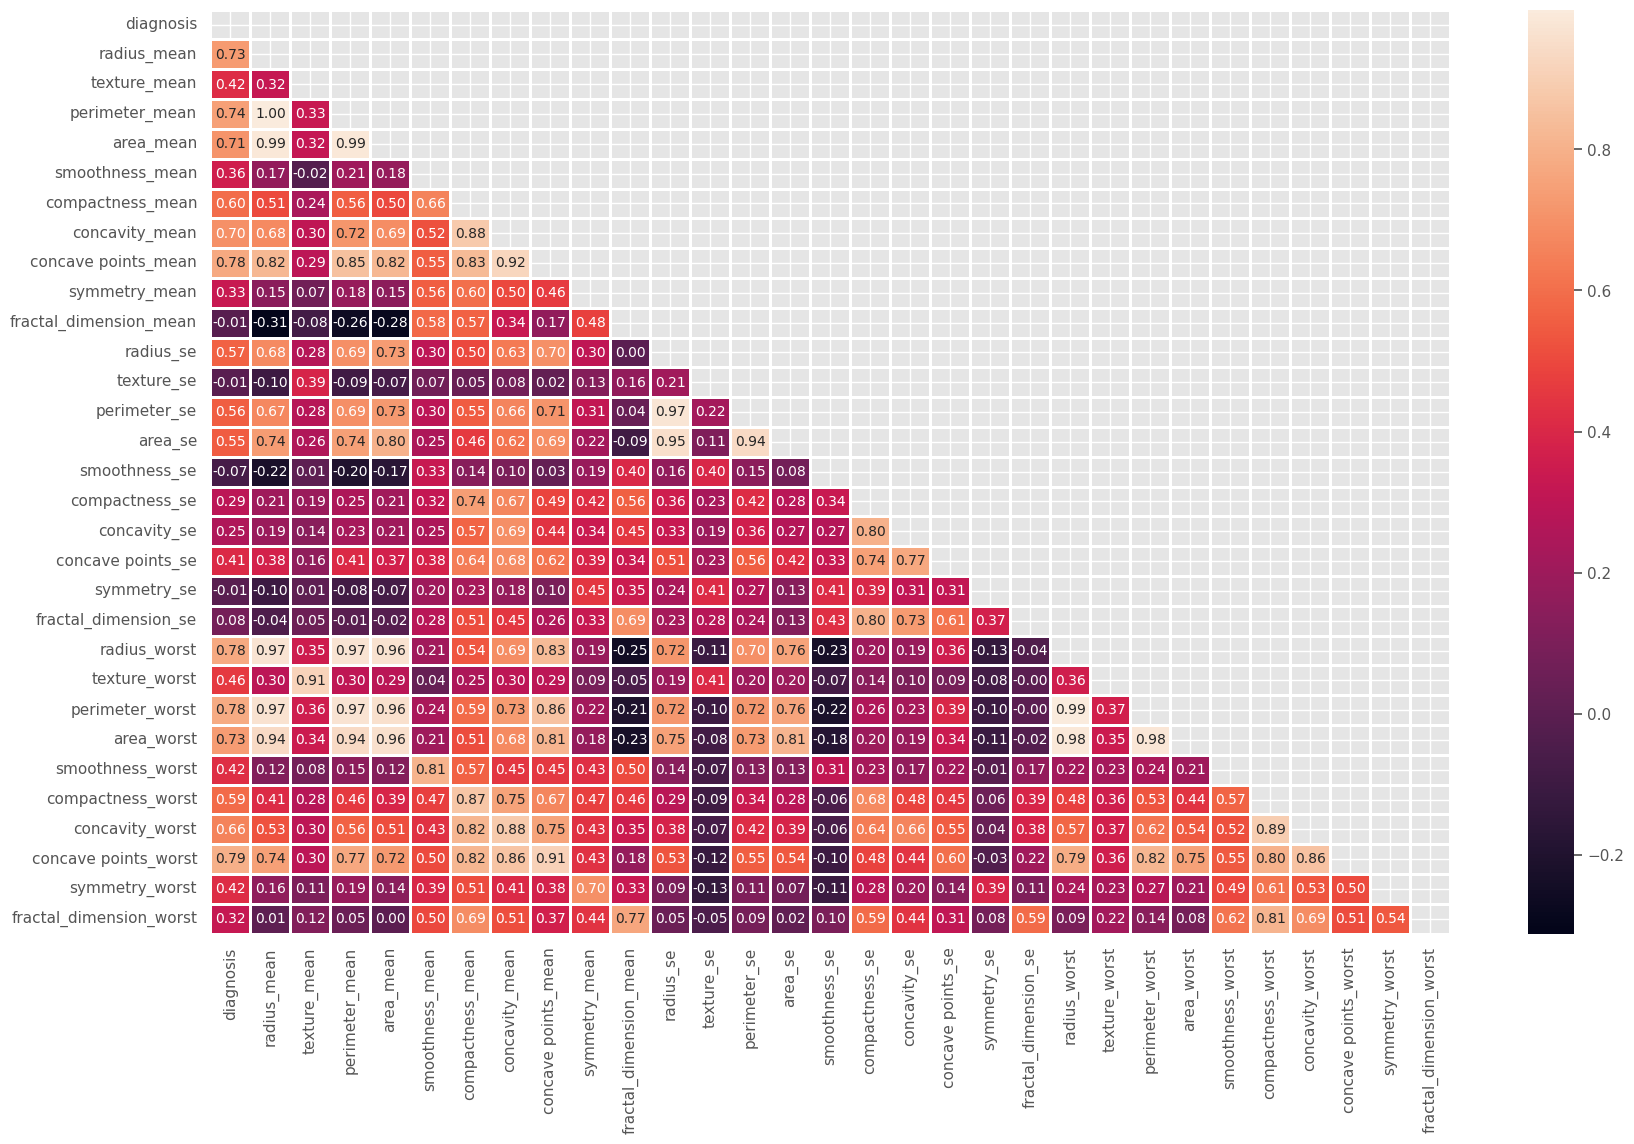

In [23]:
plt.figure(figsize=(20,12))
corr = data.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask, linewidths=1,annot=True, fmt= '.2f')
plt.show()

## Selection of best feature

In [24]:
corr_matrix = data.corr().abs()
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]
data.drop(to_drop,axis=1,inplace=True)


In [25]:
data.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
features = data.columns
features

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
x = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [28]:
print(x.shape)
print(y.shape)

(569, 22)
(569,)


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 22), (114, 22), (455,), (114,))

## Normalization of values

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [32]:
x_train.shape,x_test.shape

((455, 22), (114, 22))

In [34]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Logistic Regression

In [ ]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg_model.predict(x_test)

## Evaluation of Logistic Regression Model

In [ ]:
training_accuracy = accuracy_score(y_train,log_reg_model.predict(x_train))
training_accuracy*100

98.68131868131869

In [ ]:
test_accuracy_lr = accuracy_score(y_test,y_pred)
test_accuracy_lr*100

97.36842105263158

In [ ]:
col_name = data.columns

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[70  1]
 [ 2 41]]


In [ ]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
def plot_roc(model):
  fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
  roc_auc = auc(fpr,tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

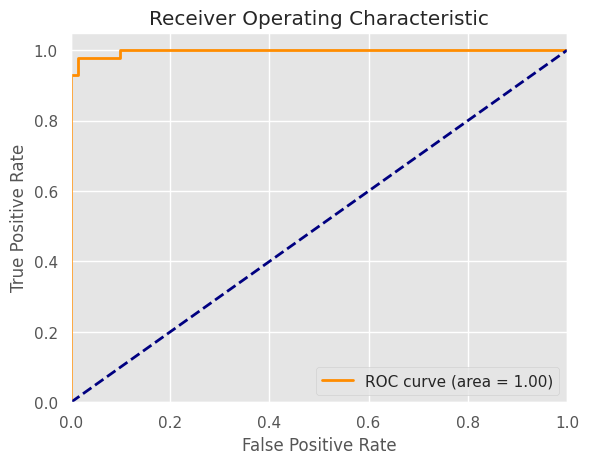

In [ ]:
plot_roc(log_reg_model)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred  = knn.predict(x_test)

## Evaluation of KNN Model

In [ ]:
training_accuracy = accuracy_score(y_train,knn.predict(x_train))
print(training_accuracy*100)

97.14285714285714


In [ ]:
test_accuracy_knn = accuracy_score(y_test,y_pred)
print(test_accuracy_knn*100)

93.85964912280701


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[68  3]
 [ 4 39]]


In [ ]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



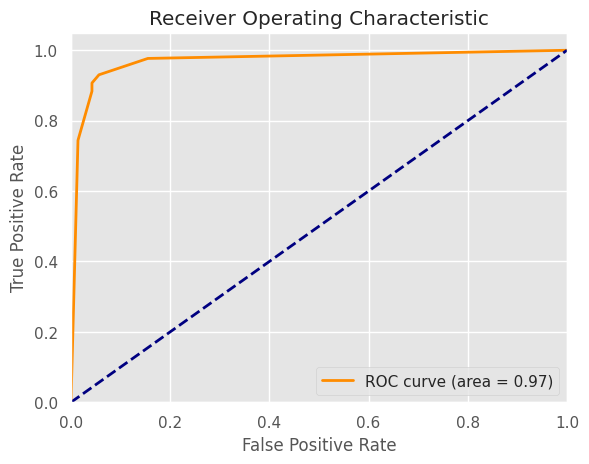

In [ ]:
plot_roc(knn)

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
svc = SVC(probability=True)

In [ ]:
parameters ={
    'gamma':[0.0001,0.001,0.01,0.1],
    'C':[0.01,0.05,0.5,0.1,1,10,15,20]
}
grid_search = GridSearchCV(svc,parameters)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
grid_search.best_estimator_

SVC(C=15, gamma=0.01, probability=True)

In [ ]:
grid_search.best_score_

0.9714285714285715

In [ ]:
svc = SVC(C=15,gamma=0.01,probability=True)
svc.fit(x_train,y_train)

SVC(C=15, gamma=0.01, probability=True)

In [ ]:
y_pred = svc.predict(x_test)

### Evaluation of SVC

In [ ]:
training_accuracy = accuracy_score(y_train,svc.predict(x_train))
print(training_accuracy*100)

98.9010989010989


In [ ]:
test_accuracy_svc = accuracy_score(y_test,y_pred)
print(test_accuracy_svc*100)

98.24561403508771


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[71  0]
 [ 2 41]]


In [ ]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



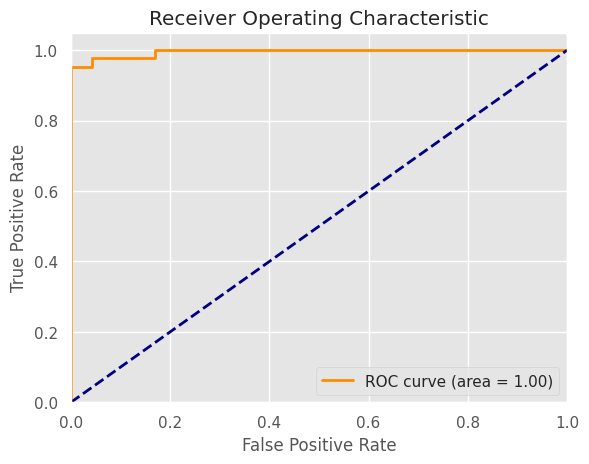

In [ ]:
plot_roc(svc)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:

parameters ={
    'criterion':['gini','entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf':range(2,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}
grid_search_dt=GridSearchCV(dtc,parameters,cv=5,n_jobs=-1,verbose=1)
grid_search_dt.fit(x_train,y_train)

Fitting 5 folds for each of 7680 candidates, totalling 38400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 29,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'splitter': 'random'}

In [ ]:
grid_search_dt.best_score_

0.9626373626373628

In [ ]:
decisiontree = DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=4,min_samples_split=9,splitter='random')

In [ ]:
decisiontree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=9, splitter='random')

In [ ]:
y_pred_dt =decisiontree.predict(x_test)

## Evaluation of Decsison Tree


In [ ]:
training_accuracy_dt = accuracy_score(y_train,decisiontree.predict(x_train))
print(training_accuracy_dt)
test_accuracy_dt = accuracy_score(y_test,y_pred_dt)
print(test_accuracy_dt)
cm_dt = confusion_matrix(y_test,y_pred_dt)
print(cm_dt)
classification_report_dt = classification_report(y_test,y_pred_dt)
print(classification_report_dt)

0.9538461538461539
0.9385964912280702
[[67  4]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



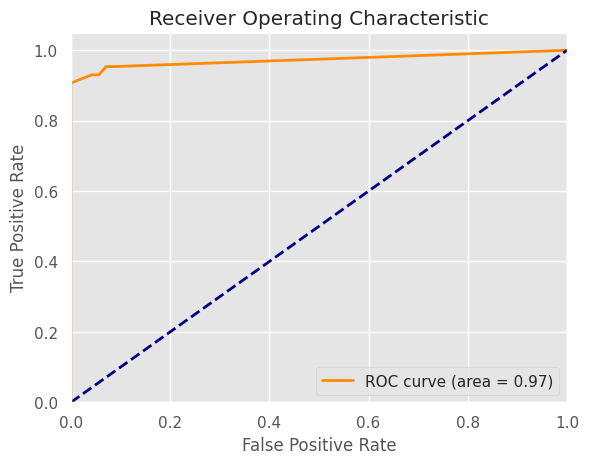

In [ ]:
plot_roc(decisiontree)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forestclassifier = RandomForestClassifier(criterion='entropy',max_depth=10,max_features=0.5,min_samples_leaf=2,min_samples_split=3,n_estimators=130)
forestclassifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred_forestclassifier =forestclassifier.predict(x_test)

## Evaluation of RandomForestClassifier

In [ ]:
training_accuracy_forestclassifier = accuracy_score(y_train,forestclassifier.predict(x_train))
print(training_accuracy_forestclassifier)
test_accuracy_forestclassifier = accuracy_score(y_test,y_pred_forestclassifier)
print(test_accuracy_forestclassifier)
cm_forestclassifier = confusion_matrix(y_test,y_pred_forestclassifier)
print(cm_dt)
classification_report_forestclassifier = classification_report(y_test,y_pred_forestclassifier)
print(classification_report_forestclassifier)

1.0
0.956140350877193
[[67  4]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



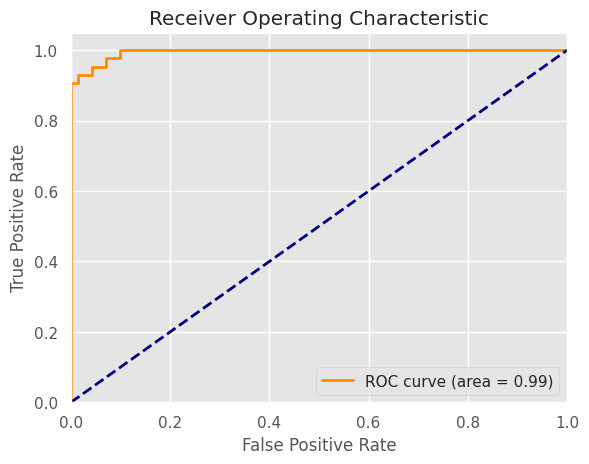

In [ ]:
plot_roc(forestclassifier)

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
parameters ={
    'loss':['deviance','exponential'],
    'learning_rate':[0.001,0.1],
    'n_estimators':[100,150,180]
}
grid_search_gbc=GridSearchCV(gbc,parameters,cv=2,n_jobs=-5,verbose=1)
grid_search_gbc.fit(x_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [ ]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 180}

In [ ]:
grid_search_gbc.best_score_

0.9538411005487286

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 180)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

In [ ]:
y_pred_gbc = gbc.predict(x_test)

## Evaluation of Gradient Boosting Classifier

In [ ]:
training_accuracy_gbc = accuracy_score(y_train,gbc.predict(x_train))
print(training_accuracy_gbc)
test_accuracy_gbc = accuracy_score(y_test,y_pred_gbc)
print(test_accuracy_gbc)
cm_gbc = confusion_matrix(y_test,y_pred_gbc)
print(cm_gbc)
classification_report_gbc = classification_report(y_test,y_pred_gbc)
print(classification_report_gbc)

1.0
0.956140350877193
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



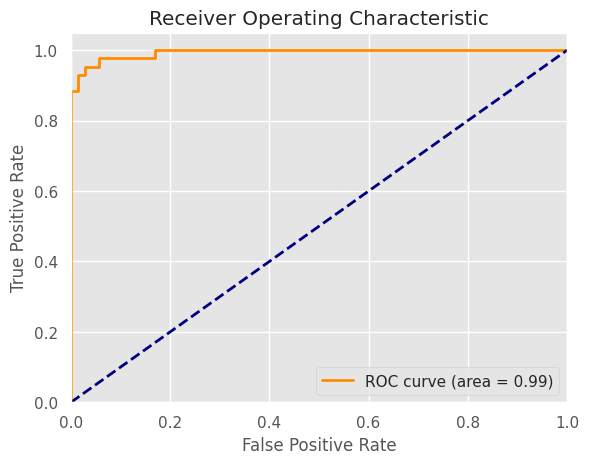

In [ ]:
plot_roc(gbc)

In [ ]:
trained_models = pd.DataFrame({
    'Models': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
    'Test Score': [100*round(test_accuracy_lr,4), 100*round(test_accuracy_knn,4), 100*round(test_accuracy_svc,4), 100*round(test_accuracy_dt,4), 100*round(test_accuracy_forestclassifier,4),
              100*round(test_accuracy_gbc,4)]
})
trained_models.sort_values(by = 'Test Score', ascending = False)

,Models,Test Score
2,SVM,98.25
0,Logistic Regression,97.37
4,Random Forest Classifier,95.61
5,Gradient Boosting Classifier,95.61
1,KNN,93.86
3,Decision Tree Classifier,93.86


## We select Support Vector Classifier for Breast Cancer Prediction

In [ ]:
import pickle
pickle.dump(svc,open('breast_cancer_prediction_model.pkl','wb'))